**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Load dataset
df = pd.read_csv("/content/heart_disease.csv")

# **01) Data Cleaning**

## **1.1 Identify Missing Values**

In [ ]:
# === Before cleaning ===
print("Total rows:", df.shape[0])
print(df['Heart Disease Status'].value_counts())
print("Null values per column:\n", df.isnull().sum())

Total rows: 7067
Heart Disease Status
No     5632
Yes    1435
Name: count, dtype: int64
Null values per column:
 Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


## **1.2 Remove Null Values**

In [ ]:
before_rows = df.shape[0]
df = df.dropna()
after_rows = df.shape[0]

print("Total rows:", after_rows)
print(df['Heart Disease Status'].value_counts())
print(f"Removed {before_rows - after_rows} rows containing null values.")

Total rows: 7067
Heart Disease Status
No     5632
Yes    1435
Name: count, dtype: int64
Removed 0 rows containing null values.


## **1.3 Balance Dataset**

In [ ]:
# 1.2 Balance Dataset
df_yes = df[df['Heart Disease Status'] == "Yes"]
df_no = df[df['Heart Disease Status'] == "No"]

# Match 'No' count to 'Yes' count
df_no_sampled = df_no.sample(n=len(df_yes), random_state=42)

# Combine both classes
df_balanced = pd.concat([df_yes, df_no_sampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Final balance check
print("\n=== After balancing ===")
print(df_balanced['Heart Disease Status'].value_counts())



=== After balancing ===
Heart Disease Status
Yes    1435
No     1435
Name: count, dtype: int64


## **1.4 Detecting the Duplicates**

In [ ]:
duplicated_rows_df_balanced = df_balanced[df_balanced.duplicated()]
print("Number of Duplicated Rows: ",duplicated_rows_df_balanced.shape)

Number of Duplicated Rows:  (0, 21)


In [ ]:
df_balanced.shape

(2870, 21)

In [ ]:
df_balanced.count()

,0
Age,2870
Gender,2870
Blood Pressure,2870
Cholesterol Level,2870
Exercise Habits,2870
Smoking,2870
Family Heart Disease,2870
Diabetes,2870
BMI,2870
High Blood Pressure,2870


# **6. Feature** **Engineering**

## **6.1 Feature Creation**

In [ ]:
heart_df = df.groupby('Age').agg({
    'Blood Pressure': 'mean',
    'Cholesterol Level': 'mean',
    'BMI': 'mean',
    'Heart Disease Status': 'count'
}).reset_index()

# Aggregate patient data by Age to create age-level features:
# - Average blood pressure
# - Average cholesterol level
# - Average BMI
# - Count of patients (with heart disease status recorded)

In [ ]:
heart_df = df_balanced.groupby('Age').agg({
    'Blood Pressure': 'mean',
    'Cholesterol Level': 'mean',
    'BMI': 'mean',
    'Heart Disease Status': 'count'
}).reset_index()

# Add composite risk score (example: average of Blood Pressure, Cholesterol Level, and BMI)
heart_df['CompositeRiskScore'] = (heart_df['Blood Pressure'] + heart_df['Cholesterol Level'] + heart_df['BMI']) / 3
print(heart_df.head())

    Age  Blood Pressure  Cholesterol Level        BMI  Heart Disease Status  \
0  18.0      153.980000         230.480000  28.323318                    50   
1  19.0      150.740000         223.260000  28.319386                    50   
2  20.0      148.767442         228.581395  29.611322                    43   
3  21.0      153.375000         226.083333  29.133938                    48   
4  22.0      150.558140         225.976744  28.494748                    43   

   CompositeRiskScore  
0          137.594439  
1          134.106462  
2          135.653386  
3          136.197424  
4          135.009877  


### **6.2 Recency, Frequency, Monetary (RFM) Features**

In [ ]:
# No date column in the heart disease dataset, so no datetime conversion needed

# Example: Health metrics calculation
health_metrics = df.groupby('Age').agg({
    'Age': lambda x: (df['Age'].max() - x.max()),
    'Gender': 'count',
    'Blood Pressure': lambda x: (x * df.loc[x.index, 'Cholesterol Level']).mean()
})
health_metrics.columns = ['AgeRecency', 'PatientCount', 'AvgBPCholProduct']

## **6.3 Clustering-Ready Features**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
health_metrics_scaled = scaler.fit_transform(health_metrics)

# Normalize health metrics features using StandardScaler:
#  Scales AgeRecency, PatientCount, and AvgBPCholProduct values to have mean = 0 and standard deviation = 1
#  Helps improve performance of machine learning models by removing bias from feature scale differences

## **6.4 EDA Visualization**

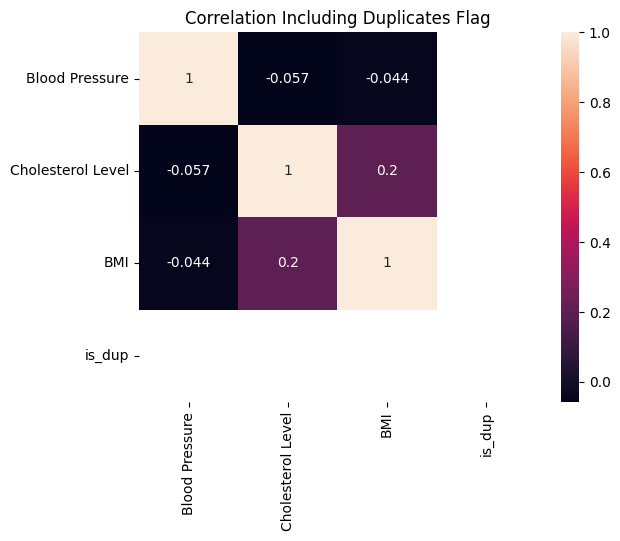

In [ ]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Duplicate heatmap (simplified) - Comment: Flag duplicates per row
df['is_dup'] = df.duplicated(keep=False)
sns.heatmap(df[['Blood Pressure', 'Cholesterol Level', 'BMI', 'is_dup']].head(100).corr(), annot=True)
plt.title('Correlation Including Duplicates Flag')
plt.show()